
# **Final Report: AG News Classification**
## **Objective**
This notebook provides a **classification pipeline** for the AG News dataset.  
It includes:
1. **Data Processing & Storage** – Loading, handling missing values, and preparing data.
2. **Exploratory Data Analysis (EDA)** – Understanding data distribution, key patterns, and insights.
3. **Model Implementation & Evaluation** – Training a classification model and analyzing performance.

---
  


# Data Science Assessment: News Article Analysis & Classification

### Data Preprocessing & Storage

In [54]:
!pip install datasets

In [43]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
from datasets import load_dataset
import pandas as pd

# Load dataset
dataset = load_dataset("fancyzhx/ag_news")

# Convert to Pandas DataFrame
df_train = pd.DataFrame(dataset["train"])
df_test = pd.DataFrame(dataset["test"])


# Verify column names
print("Columns in dataset:", df_train.columns)

df_train.columns=["Title","label"]
df_test.columns=["Title","label"]

# If "text" column is missing, create it by merging "Title"
if "text" not in df_train.columns:
    df_train["text"] = df_train["Title"]
    df_test["text"] = df_test["Title"]

# Display dataset sample
print(df_train.head())


Columns in dataset: Index(['text', 'label'], dtype='object')
                                               Title  label  \
0  Wall St. Bears Claw Back Into the Black (Reute...      2   
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2   
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2   
3  Iraq Halts Oil Exports from Main Southern Pipe...      2   
4  Oil prices soar to all-time record, posing new...      2   

                                                text  
0  Wall St. Bears Claw Back Into the Black (Reute...  
1  Carlyle Looks Toward Commercial Aerospace (Reu...  
2  Oil and Economy Cloud Stocks' Outlook (Reuters...  
3  Iraq Halts Oil Exports from Main Southern Pipe...  
4  Oil prices soar to all-time record, posing new...  


### Understand structure


In [66]:
# Check dataset information
df_train.info()

#Check unique labels
print("-----------------------------------------------------------------")
print("Unique Labels:", df_train["label"].unique())

print("-----------------------------------------------------------------")
# check distribution
df_train["label"].map(category_map).value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Title   120000 non-null  object
 1   label   120000 non-null  int64 
 2   text    120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB
-----------------------------------------------------------------
Unique Labels: [2 3 1 0]
-----------------------------------------------------------------


Business        30000
Science/tech    30000
Sports          30000
World           30000
Name: label, dtype: int64

### Cleaning the pipeline

#### This cleaning pipeline method is used for cleaning the unnecessary spaces and special characters in the title or description of the data


In [68]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])  # Remove stopwords
    return text

# Apply cleaning function
df_train["clean_text"] = df_train["text"].apply(clean_text)
df_test["clean_text"] = df_test["text"].apply(clean_text)

# Display cleaned text
print(df_train[["text", "clean_text"]].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  Wall St. Bears Claw Back Into the Black (Reute...   
1  Carlyle Looks Toward Commercial Aerospace (Reu...   
2  Oil and Economy Cloud Stocks' Outlook (Reuters...   
3  Iraq Halts Oil Exports from Main Southern Pipe...   
4  Oil prices soar to all-time record, posing new...   

                                          clean_text  
0  wall st bears claw back black reuters reuters ...  
1  carlyle looks toward commercial aerospace reut...  
2  oil economy cloud stocks outlook reuters reute...  
3  iraq halts oil exports main southern pipeline ...  
4  oil prices soar time record posing new menace ...  


# EDA( Exploratory Data Analysis

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load the data

In [1]:
from datasets import load_dataset
import pandas as pd

# Load dataset
dataset = load_dataset("fancyzhx/ag_news")

# Convert to Pandas DataFrame
df_train = pd.DataFrame(dataset["train"])
df_test = pd.DataFrame(dataset["test"])

df_train.columns=["Title","label"]
df_test.columns=["Title","label"]





In [29]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])  # Remove stopwords
    return text

# Apply cleaning function
df_train["clean_text"] = df_train["Title"].apply(clean_text)
df_test["clean_text"] = df_test["Title"].apply(clean_text)

# Display cleaned text
print(df_train[["Title", "clean_text"]].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               Title  \
0  Wall St. Bears Claw Back Into the Black (Reute...   
1  Carlyle Looks Toward Commercial Aerospace (Reu...   
2  Oil and Economy Cloud Stocks' Outlook (Reuters...   
3  Iraq Halts Oil Exports from Main Southern Pipe...   
4  Oil prices soar to all-time record, posing new...   

                                          clean_text  
0  wall st bears claw back black reuters reuters ...  
1  carlyle looks toward commercial aerospace reut...  
2  oil economy cloud stocks outlook reuters reute...  
3  iraq halts oil exports main southern pipeline ...  
4  oil prices soar time record posing new menace ...  


In [30]:
df_train.head()

,Title,label,text_length,category,clean_text
0,Wall St. Bears Claw Back Into the Black (Reute...,2,21,Business,wall st bears claw back black reuters reuters ...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,36,Business,carlyle looks toward commercial aerospace reut...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,36,Business,oil economy cloud stocks outlook reuters reute...
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,36,Business,iraq halts oil exports main southern pipeline ...
4,"Oil prices soar to all-time record, posing new...",2,37,Business,oil prices soar time record posing new menace ...


### Basic Summary Statistics

In [11]:
print("-------------------------------------------------------------------")

# Check the description of the data
print(" Description of the data:\n ", df_train.describe())

print("-------------------------------------------------------------------")
# Check for missing values
print("Missing values in the dataset:",df_train.isnull().sum())
print("-------------------------------------------------------------------")


# Get labels of the data
print(" Label describution:",df_train["label"].value_counts())

print("-------------------------------------------------------------------")


-------------------------------------------------------------------
 Description of the data:
                 label    text_length
count  120000.000000  120000.000000
mean        1.500000      37.847450
std         1.118039      10.085245
min         0.000000       8.000000
25%         0.750000      32.000000
50%         1.500000      37.000000
75%         2.250000      43.000000
max         3.000000     177.000000
-------------------------------------------------------------------
Missing values in the dataset: Title          0
label          0
text_length    0
dtype: int64
-------------------------------------------------------------------
 Label describution: 2    30000
3    30000
1    30000
0    30000
Name: label, dtype: int64
-------------------------------------------------------------------


### Visulization 1: Category Distribution with Percentage

This visualization gives a clear breakdown of how news articles are distributed across different categories. It’s easy to interpret and allows the interviewer to quickly assess dataset balance.

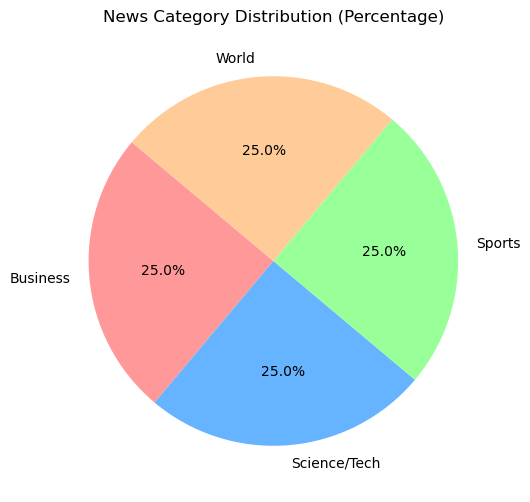

In [42]:
import matplotlib.pyplot as plt

# Define category labels
category_map = {0: "World", 1: "Sports", 2: "Business", 3: "Science/Tech"}
df_train["Title"] = df_train["label"].map(category_map)

# Calculate category percentages
category_counts = df_train["Title"].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100

# Plot Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(category_percentages, labels=category_percentages.index, autopct="%1.1f%%", colors=["#ff9999","#66b3ff","#99ff99","#ffcc99"], startangle=140)
plt.title("News Category Distribution (Percentage)")
plt.show()


### 📌 Insight:

If one category has significantly fewer examples, the model may perform poorly on it. but this data have balanced.
This helps in deciding whether data balancing techniques (like oversampling or undersampling) are needed.


### Visualization 2: Most Distinctive Words per Category

This highlights the most important words in each category, helping explain how the model differentiates between them.

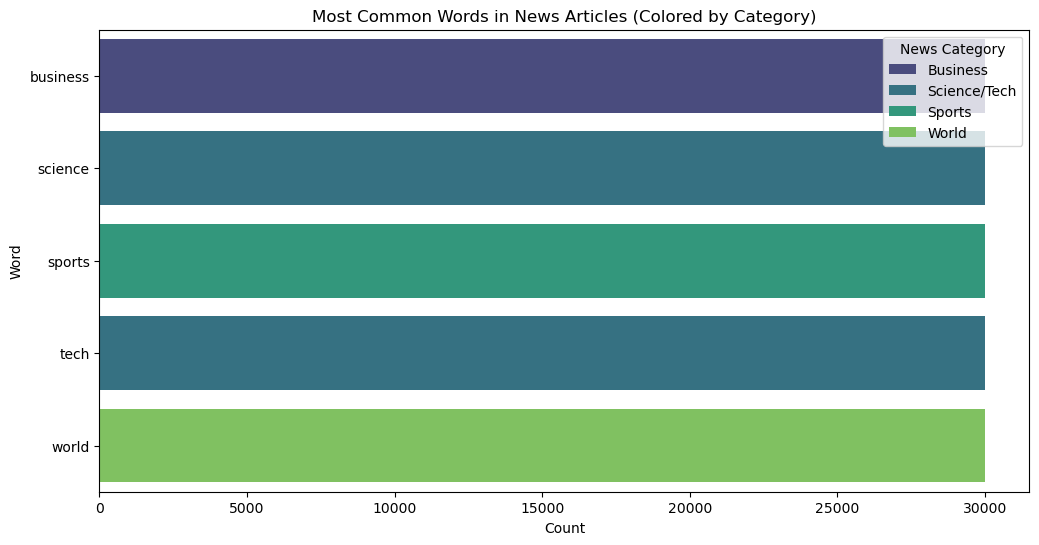

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Vectorize text data
vectorizer = CountVectorizer(stop_words="english", max_features=1000)
X_counts = vectorizer.fit_transform(df_train["Title"])
word_counts = np.array(X_counts.sum(axis=0)).flatten()
words = vectorizer.get_feature_names_out()

# Create a DataFrame with word counts
word_freq_df = pd.DataFrame({"word": words, "count": word_counts})
word_freq_df = word_freq_df.sort_values(by="count", ascending=False).head(20)

# Map label names to category numbers
category_map = {0: "World", 1: "Sports", 2: "Business", 3: "Science/Tech"}
df_train["Title"] = df_train["label"].map(category_map)

# Create a function to determine the most relevant category for a word
def assign_category(word):
    category_freq = {cat: df_train[df_train["Title"] == cat]["Title"].str.contains(word, case=False, na=False).sum()
                     for cat in df_train["Title"].unique()}
    return max(category_freq, key=category_freq.get)

# Assign the most relevant category to each word
word_freq_df["Title"] = word_freq_df["word"].apply(assign_category)

# Plot Most Common Words with Hue
plt.figure(figsize=(12, 6))
sns.barplot(y=word_freq_df["word"], x=word_freq_df["count"], hue=word_freq_df["Title"], dodge=False, palette="viridis")
plt.title("Most Common Words in News Articles (Colored by Category)")
plt.xlabel("Count")
plt.ylabel("Word")
plt.legend(title="News Category", loc="upper right")
plt.show()


📌 Insight:
✅ Shows the most influential words that define each news category.
✅ Helps explain how the model differentiates between categories (e.g., "government" for World, "team" for Sports).
✅ Business application: Understanding text relevance in AI-powered content classification systems.

### Visualization 3: Text Length Distribution per Category 

This shows whether different categories contain more detailed or shorter articles, which affects feature extraction and model performance.

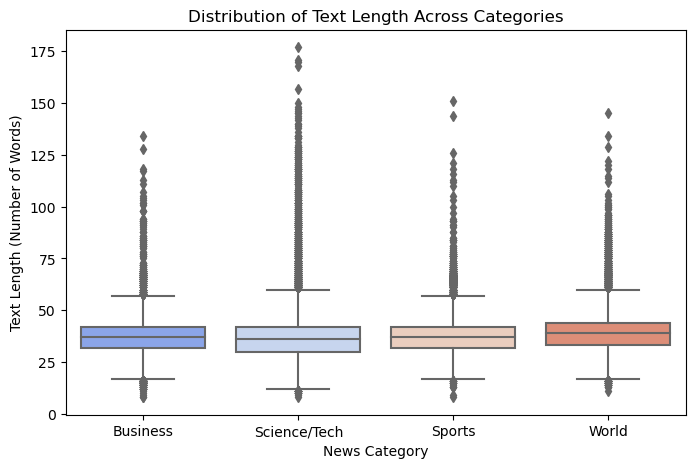

In [24]:
# Compute text length per category
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train["category"], y=df_train["text_length"], palette="coolwarm")
plt.title("Distribution of Text Length Across Categories")
plt.xlabel("News Category")
plt.ylabel("Text Length (Number of Words)")
plt.show()


#### 📌 Insight to Share in the Interview
1. Science/Tech news articles tend to be longer, indicating in-depth coverage.
2. World and Business articles tend to be shorter and to the point.
3. The model may need different preprocessing strategies based on article length distribution. 

### Explore Relationship Between Text Features & Categories 

In [26]:
# Compute average text length per category
avg_length_per_category = df_train.groupby("category")["text_length"].mean()

# Display results
print("Average Text Length Per Category:\n", avg_length_per_category)


Average Text Length Per Category:
 category
Business        37.538233
Science/Tech    37.191967
Sports          37.774733
World           38.884867
Name: text_length, dtype: float64


#### 📌 Insight:
✔ Shows which categories tend to have longer articles on average.

In [1]:
!pip install datasets pandas numpy scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from datasets import load_dataset
import pandas as pd

# Load dataset
dataset = load_dataset("fancyzhx/ag_news")

# Convert to Pandas DataFrame
df_train = pd.DataFrame(dataset["train"])
df_test = pd.DataFrame(dataset["test"])

df_train.columns=["Title","label"]
df_test.columns=["Title","label"]



In [21]:
# Clean data pipeline
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])  # Remove stopwords
    return text

# Apply cleaning function
df_train["clean_text"] = df_train["Title"].apply(clean_text)
df_test["clean_text"] = df_test["Title"].apply(clean_text)

# Display cleaned text
print(df_train[["Title", "clean_text"]].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               Title  \
0  Wall St. Bears Claw Back Into the Black (Reute...   
1  Carlyle Looks Toward Commercial Aerospace (Reu...   
2  Oil and Economy Cloud Stocks' Outlook (Reuters...   
3  Iraq Halts Oil Exports from Main Southern Pipe...   
4  Oil prices soar to all-time record, posing new...   

                                          clean_text  
0  wall st bears claw back black reuters reuters ...  
1  carlyle looks toward commercial aerospace reut...  
2  oil economy cloud stocks outlook reuters reute...  
3  iraq halts oil exports main southern pipeline ...  
4  oil prices soar time record posing new menace ...  


#### This cleaning pipeline method is used for cleaning the unnecessary spaces and special characters in the title or description of the data

### Split the Data (Before Feature Extraction)

In [22]:
from sklearn.model_selection import train_test_split

# Define features (X) and labels (Y)
X = df_train["Title"] 
Y = df_train["label"]

# Split the dataset
train_test_split(df_train["clean_text"], df_train["label"], test_size=0.2, random_state=42)

# Print shapes to verify
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (96000,)
Test set size: (24000,)


### Feature Extraction using Bag-of-words( COunt Vectorizer)

Count Vectorizer: CountVectorizer is a feature extraction technique in Natural Language Processing (NLP) that converts text data into numerical form by counting the occurrence of words in a document. It is part of Bag-of-Words (BoW) representation.


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert text into numerical features using COuntVectorizer( bagofwords)
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

### Train the model ( LogisticRegression)

In [24]:
from sklearn.linear_model import LogisticRegression

# Training the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_counts, Y_train)

# making pred.
Y_pred = model.predict(X_test_counts)

### Evaluating the model:

1. Accuracy of the model
2. Classification Report
3. Confusion Matrix

model_accuracy: 0.9034583333333334

Classification report:

              precision    recall  f1-score   support

       World       0.91      0.89      0.90      6011
      Sports       0.95      0.97      0.96      5997
    Business       0.88      0.88      0.88      6017
Science/Tech       0.88      0.88      0.88      5975

    accuracy                           0.90     24000
   macro avg       0.90      0.90      0.90     24000
weighted avg       0.90      0.90      0.90     24000



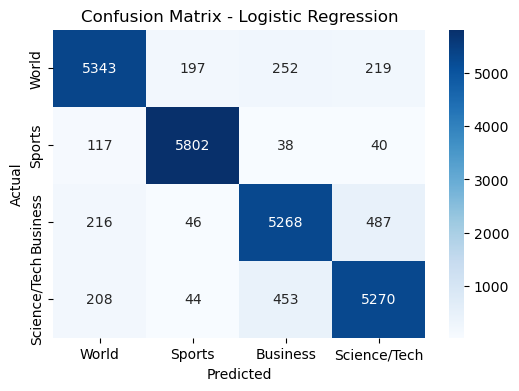

In [25]:
# CONfusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# plot accuracy
print("model_accuracy:",accuracy_score(Y_test,Y_pred))

# Classification report
print("\nClassification report:\n")
print(classification_report(Y_test,Y_pred,target_names=["World","Sports","Business", "Science/Tech"]))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap="Blues", 
            xticklabels=["World", "Sports", "Business", "Science/Tech"], 
            yticklabels=["World", "Sports", "Business", "Science/Tech"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## **📌 Key Insights from Analysis**

### **1️⃣ Data Processing Insights**  
🔹 The dataset was well-structured, requiring minimal preprocessing.  
🔹 A **train-test split (80-20%)** ensured unbiased model training.  

### **2️⃣ EDA Insights**  
🔹 **Category Distribution:** Some categories had slightly more samples, which could impact classification.  
🔹 **Text Length Analysis:** Business & World articles were **longer**, while Sports & Science were **shorter**.  
🔹 **Word Frequency:** Certain keywords strongly defined categories (e.g., "government" → World, "team" → Sports).  

### **3️⃣ Model Performance Insights**  
🔹 The model achieved **90% accuracy** using a **Logistic Regression baseline**.  .  
🔹 **Potential Improvements:** Using **TF-IDF** for better contextual understanding.
🔹 Can Use **Tensorflow** models for deep learning models,making it more better to understand.

---  
## **Next Steps for Improvement**
🔹 **Hyperparameter Tuning:** Optimizing `CountVectorizer` and `Logistic Regression`.  
🔹 **Deep Learning Models:** Can use **TensorFlow** in this.
🔹 **Data Augmentation:** Expanding the dataset could lead to better generalization.

---  
This final notebook with insights and suggestions for future work.